# Project in GMML

In the file './code', you will find most of the code used here :
    - dynamictimewarping.py contains an implementation of a class DTW which takes for sole argument the distance used when computing the dynamic time warping. Its main method is 'fit' which takes as input an array X of shape (n_timeseries, length) and returns an array dtw where dtw[i, j] is the distance given by the dynamic time warping between timeseries i and timeseries j.
    - floydwarshall.py contains an implementation of the Floyd-Warshall algorithm to get the shortest path between two vertices on a graph.
    - mmds.py contains our implementation of MMDS. It takes as input a dissimilarity matrix D and stores the stress and the embeddings while it is fitted.
    - isomap.py contains the class Isomap. It takes as argument the 'method' (i.e 'knn' or 'epsilon' to build the nearest neighbors graph) and its main method is 'fit' which computes the matrix of shortest paths (by calling FloydWarshall) and then call MMDS to have the embeddings on geodesic distances.

In [1]:
import numpy as np
import pandas as pd
from src.isomap import *
from src.dynamictimewarping import *
from src.utils import *
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')

In [3]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


The data is composed of the product code, time-series values and normalized time-series values.
There are no labels.
We decide to only keep Normalized values.

In [4]:
# Keeping only normalized values
ind = [i for i in range(data.shape[1]) if 'Normalized' in data.columns[i]]
data.head()
data = data.iloc[:, ind]

In [5]:
data.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [6]:
# Keeping only a numpy array
data = data.values

# Getting the affinity matrix (DTW)

We compute the Dynamic Time warping distances between all the time series and store them in the np array dtw

In [7]:
# dtw_ is an instance of our DTW class which computes the dynamic time warping distances
dtw_ = DTW(distance=l2)
dtw = dtw_.fit(data,verbose = True)

0.0 % done
1.2330456226880395 % done
2.466091245376079 % done
3.6991368680641186 % done
4.932182490752158 % done
6.165228113440198 % done
7.398273736128237 % done
8.631319358816276 % done
9.864364981504316 % done
11.097410604192355 % done
12.330456226880395 % done
13.563501849568436 % done
14.796547472256474 % done
16.029593094944513 % done
17.26263871763255 % done
18.495684340320594 % done
19.728729963008632 % done
20.96177558569667 % done
22.19482120838471 % done
23.42786683107275 % done
24.66091245376079 % done
25.893958076448833 % done
27.12700369913687 % done
28.36004932182491 % done
29.59309494451295 % done
30.826140567200987 % done
32.059186189889026 % done
33.292231812577064 % done
34.5252774352651 % done
35.75832305795315 % done
36.99136868064119 % done
38.224414303329226 % done
39.457459926017265 % done
40.6905055487053 % done
41.92355117139334 % done
43.15659679408138 % done
44.38964241676942 % done
45.62268803945746 % done
46.8557336621455 % done
48.088779284833535 % done
4

In [8]:
print(dtw)
print(dtw.shape)

[[0.     1.5263 2.341  ... 2.4369 2.9278 2.55  ]
 [1.5263 0.     2.2246 ... 3.2475 2.84   2.5909]
 [2.341  2.2246 0.     ... 3.9971 4.0291 4.7889]
 ...
 [2.4369 3.2475 3.9971 ... 0.     1.9375 1.9654]
 [2.9278 2.84   4.0291 ... 1.9375 0.     1.4813]
 [2.55   2.5909 4.7889 ... 1.9654 1.4813 0.    ]]
(811, 811)


We indeed notice that for the l2 norm we used, the diagonal of the dissimilarity matrix is always 0.

In [9]:
def get_closest(i, mat) :
    j = np.argsort(mat[i, :])[1]
    return j, mat[i,j]

Distance between 0 and its closest neighbor 547 : 0.8249


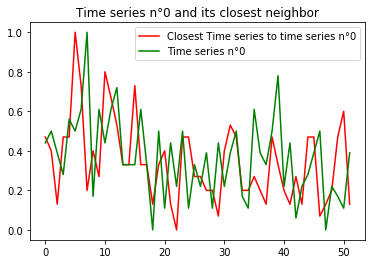

Distance between 1 and its closest neighbor 616 : 1.0414999999999994


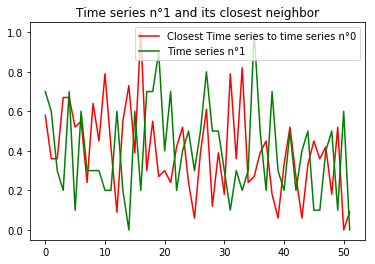

Distance between 2 and its closest neighbor 631 : 1.2954999999999999


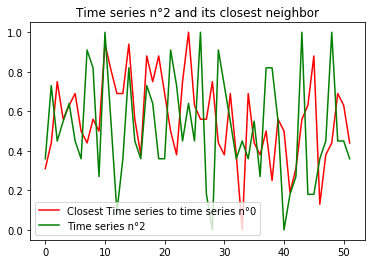

Distance between 3 and its closest neighbor 311 : 0.8337000000000001


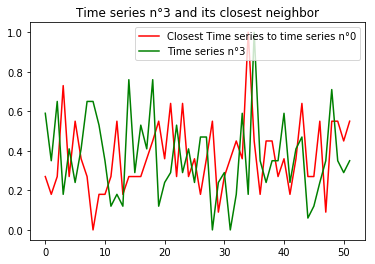

Distance between 4 and its closest neighbor 168 : 0.8916000000000003


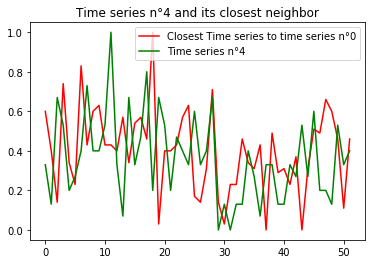

Distance between 5 and its closest neighbor 429 : 0.8054000000000003


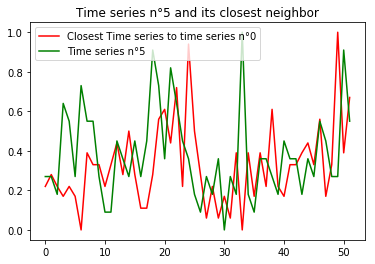

Distance between 6 and its closest neighbor 59 : 0.8920999999999999


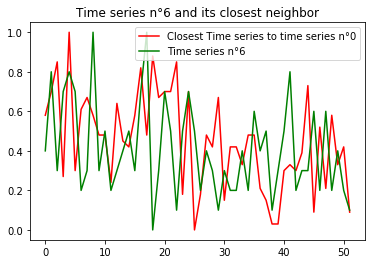

Distance between 7 and its closest neighbor 163 : 1.1202999999999999


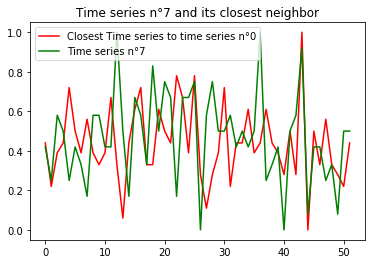

Distance between 8 and its closest neighbor 432 : 0.9481999999999998


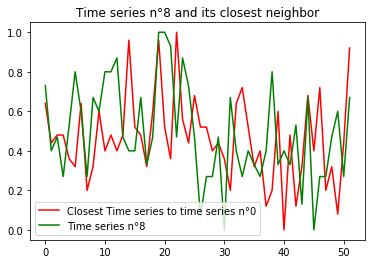

Distance between 9 and its closest neighbor 333 : 0.7161000000000001


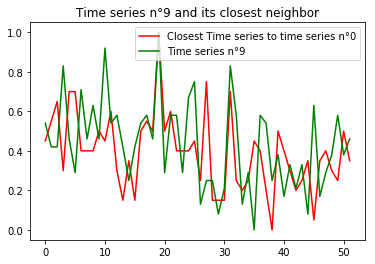

In [22]:
# Let's plot the closest neighbors of some time series
for i in range(10) :
    closest_i, dist = get_closest(i, dtw)
    print('Distance between {} and its closest neighbor {} : {}'.format(i, closest_i, dist))
    plt.plot(data[closest_i, :], color = 'r', label ='Closest Time series to time series n°0')
    plt.plot(data[i, :], color = 'green', label = 'Time series n°{}'.format(i))
    plt.legend()
    plt.title('Time series n°{} and its closest neighbor'.format(i))
    plt.show()

# Reducing the dimension using Isomap

In [11]:
# Creating an instance of isomap
iso = Isomap(k_neighbors=10, n_components=2, method='knn', n_iter=200)
# Fitting it on the dynam time warping distances
iso.fit(dtw, fill_inf=True, verbose=True) 
#fill_inf = True allows us to deal with path when they are equal to np.inf between two time series

Iter 0 out of 200 iterations
Iter 1 out of 200 iterations
Iter 2 out of 200 iterations
Iter 3 out of 200 iterations
Iter 4 out of 200 iterations
Iter 5 out of 200 iterations
Iter 6 out of 200 iterations
Iter 7 out of 200 iterations
Iter 8 out of 200 iterations
Iter 9 out of 200 iterations
Iter 10 out of 200 iterations
Iter 11 out of 200 iterations
Iter 12 out of 200 iterations
Iter 13 out of 200 iterations
Iter 14 out of 200 iterations
Iter 15 out of 200 iterations
Iter 16 out of 200 iterations
Iter 17 out of 200 iterations
Iter 18 out of 200 iterations
Iter 19 out of 200 iterations
Iter 20 out of 200 iterations
Iter 21 out of 200 iterations
Iter 22 out of 200 iterations
Iter 23 out of 200 iterations
Iter 24 out of 200 iterations
Iter 25 out of 200 iterations
Iter 26 out of 200 iterations
Iter 27 out of 200 iterations
Iter 28 out of 200 iterations
Iter 29 out of 200 iterations
Iter 30 out of 200 iterations
Iter 31 out of 200 iterations
Iter 32 out of 200 iterations
Iter 33 out of 200 i

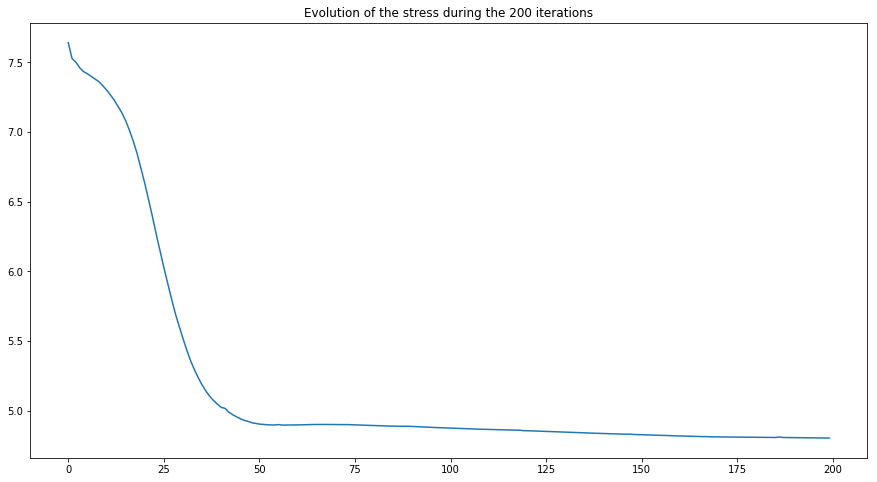

Final stress : 4.80257619702587


In [12]:
# Let's check that the stress has indeed decreased during our training
plt.figure(figsize=(15, 8))
plt.plot(iso.stress)
plt.title('Evolution of the stress during the {} iterations'.format(iso.niter))
plt.show()
print('Final stress : {}'.format(iso.stress[-1]))

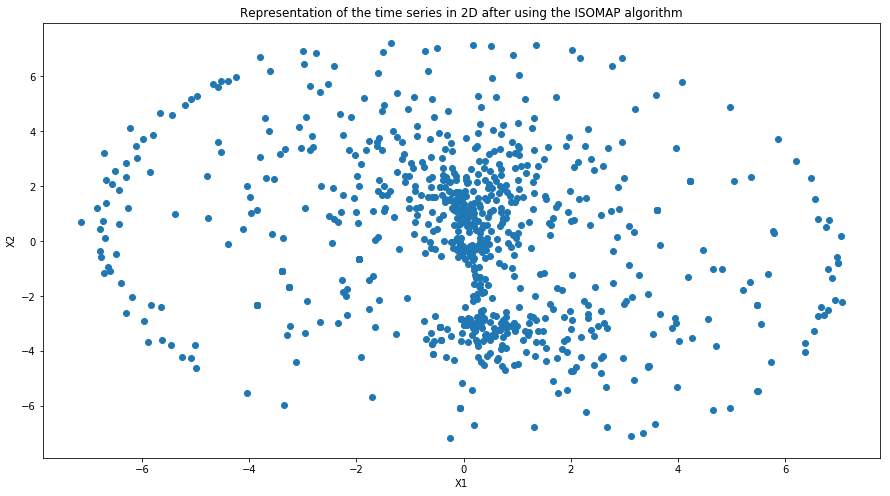

In [13]:
# Let's plot the time series in 2D
plt.figure(figsize=(15, 8))
plt.scatter(iso.X_transformed[:,0], iso.X_transformed[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Representation of the time series in 2D after using the ISOMAP algorithm')
plt.show()

In [14]:
# Let's add more components to ISOMAP to check that the final stress is indeed lower.
# Creating an instance of isomap
iso_ = Isomap(k_neighbors=10, n_components=5, method='knn', n_iter=200)
# Fitting it on the dynam time warping distances
iso_.fit(dtw, fill_inf=True, verbose=True) 
#fill_inf = True allows us to deal with path when they are equal to np.inf between two time series

Iter 0 out of 200 iterations
Iter 1 out of 200 iterations
Iter 2 out of 200 iterations
Iter 3 out of 200 iterations
Iter 4 out of 200 iterations
Iter 5 out of 200 iterations
Iter 6 out of 200 iterations
Iter 7 out of 200 iterations
Iter 8 out of 200 iterations
Iter 9 out of 200 iterations
Iter 10 out of 200 iterations
Iter 11 out of 200 iterations
Iter 12 out of 200 iterations
Iter 13 out of 200 iterations
Iter 14 out of 200 iterations
Iter 15 out of 200 iterations
Iter 16 out of 200 iterations
Iter 17 out of 200 iterations
Iter 18 out of 200 iterations
Iter 19 out of 200 iterations
Iter 20 out of 200 iterations
Iter 21 out of 200 iterations
Iter 22 out of 200 iterations
Iter 23 out of 200 iterations
Iter 24 out of 200 iterations
Iter 25 out of 200 iterations
Iter 26 out of 200 iterations
Iter 27 out of 200 iterations
Iter 28 out of 200 iterations
Iter 29 out of 200 iterations
Iter 30 out of 200 iterations
Iter 31 out of 200 iterations
Iter 32 out of 200 iterations
Iter 33 out of 200 i

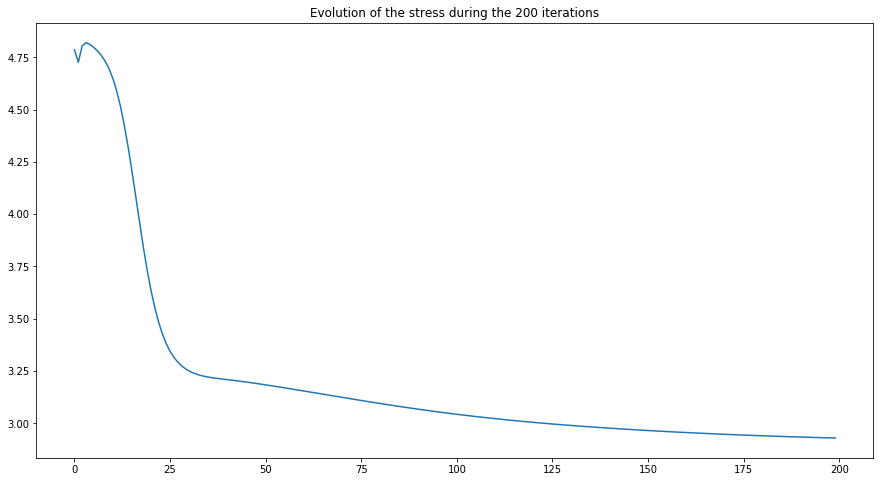

Final stress : 2.929223928201207


In [15]:
# Let's check that the stress is lower than when ISOMAP is trained with 2 components
plt.figure(figsize=(15, 8))
plt.plot(iso_.stress)
plt.title('Evolution of the stress during the {} iterations'.format(iso_.niter))
plt.show()
print('Final stress : {}'.format(iso_.stress[-1]))

$\textbf{Remarks :}$

We notice that :
- the stress is indeed decreasing, which shows that SMACOF algorithm is working.
- when reducing to a higher dimension (5 instead of 2), the stress ois lower : 2.95 instead of 4.82 which is normal since the constraints are weaker.
- in the 2D representation, it is quite hard to find clear clusters.

# Clustering the time series thanks to a simple k_means

In [16]:
# Getting the reduced time_series
X_transformed = iso_.X_transformed
print('New shape of X_transformed : ', X_transformed.shape)

New shape of X_transformed :  (811, 5)


In [18]:
from src.kmean import *
kmeans = KMeans(k=5, max_iter = 1000)
kmeans.fit(X_transformed)

In [29]:
print('Clusters found by the kmeans algorithm (k = {}) : \n'.format(kmeans.k))
print(kmeans.clusters)

Clusters found by the kmeans algorithm (k = 5) : 

[3. 0. 0. 3. 3. 3. 3. 4. 0. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 3. 3.
 3. 3. 0. 0. 3. 0. 3. 0. 0. 0. 0. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3.
 0. 0. 3. 3. 3. 3. 0. 3. 3. 0. 4. 3. 3. 0. 3. 3. 0. 0. 3. 3. 3. 3. 0. 3.
 3. 3. 3. 3. 4. 3. 3. 3. 0. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 0. 3. 3. 3. 0. 0. 3. 4. 3. 3. 3. 4. 3. 3. 3. 3. 0. 0. 3. 3. 3. 0. 3.
 0. 4. 0. 0. 3. 4. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3.
 3. 3. 0. 4. 0. 0. 3. 4. 3. 0. 3. 4. 0. 3. 4. 0. 4. 3. 3. 3. 0. 4. 3. 3.
 3. 3. 0. 0. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3. 3.
 3. 0. 3. 0. 4. 3. 0. 3. 4. 3. 0. 4. 3. 3. 3. 3. 4. 3. 0. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 4. 1. 4. 2. 0. 1. 2. 1. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 1. 4. 2. 2. 4. 2. 2. 1. 2. 2. 2. 1. 3. 3. 3. 0.
 4. 3. 4. 3. 3. 3. 4. 2. 2. 2. 2. 2. 2. 1. 4. 1. 2. 2. 2. 3. 3. 3. 2. 1.
 2. 2. 3. 3. 0. 3. 4. 3. 3. 3. 0. 4. 0. 4. 3. 3. 0. 0. 3. 3. 0. 0. 3. 3.


# Time Series Averaging

In [28]:
# We import the code allowing us to perform time-series averaging
from src.DBA import *

In [30]:
# We create a dictionnary s.t dic[k] is a list that contains the time-series whose cluster is cluster k
dic = {}
for k in range(kmeans.k) :
    dic[k] = []
for i in range(data.shape[0]) :
    dic[kmeans.clusters[i]].append(data[i, :])

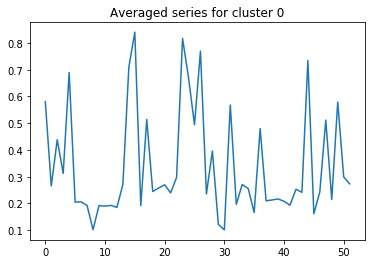

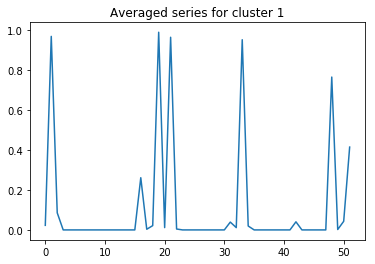

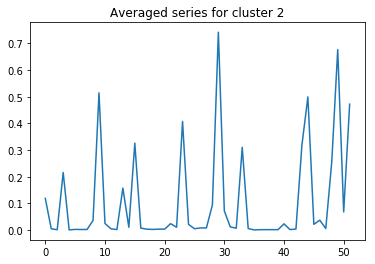

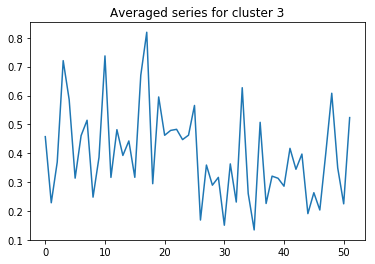

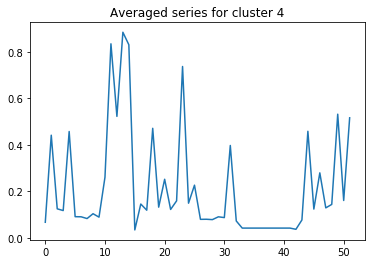

In [31]:
# We perform the DBA thanks to the code provided on GitHub by F. Petitjean
for k in range(kmeans.k) :
    seriesk = np.array(dic[k])
    average_series_k = performDBA(seriesk)
    plt.plot(average_series_k)
    plt.title('Averaged series for cluster {}'.format(k))
    plt.show()

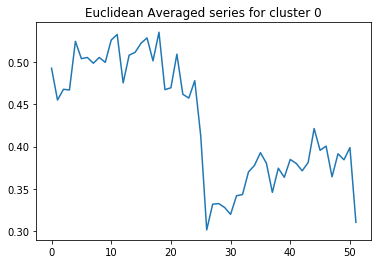

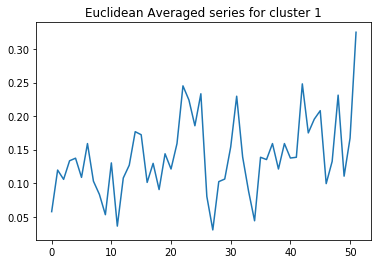

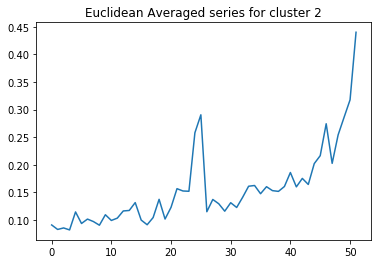

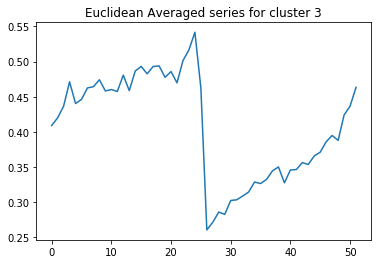

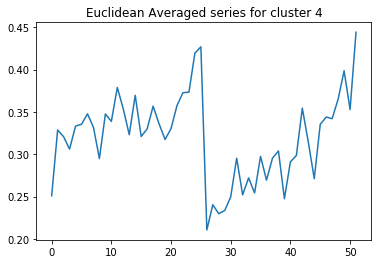

In [32]:
# Let's check the euclidean averaging we would by taking the mean
for k in range(kmeans.k) :
    l = len(dic[k])
    s = np.zeros((dic[k][0].shape[0]))
    for j in range(l) :
        s += dic[k][j] / l
    plt.plot(s)
    plt.title('Euclidean Averaged series for cluster {}'.format(k))
    plt.show()